In [117]:
# This code is written to support the experiments in the book titled:
# "Adaptive Machine Learning Algorithms"
# by
# Chanchal Chatterjee and Vwani P. Roychowdhury
# August 2021
#
# Experiments for Chapter 8 (e-shop-clothing-2008.csv Data)
# EVD on stationary data
# GEVD on stationary data#
#
# Author: Chanchal Chatterjee
#

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf


In [119]:
# Data obtained from UCI clickstream dataset for online shopping 
# https://archive.ics.uci.edu/ml/datasets/clickstream+data+for+online+shopping
# Load data into your unique bucket. 
# Here AdaptiveMLAlgorithms/Data/e-shop-clothing-2008.csv

In [120]:
dataset = pd.read_csv("../Data/e-shop-clothing-2008.csv")
dataset = dataset.dropna()
dataset = dataset.drop(['year','month','day','sessionID','clothing_model'], 1)
print(dataset.shape)
print(dataset.head())


(165474, 9)
   order  country  main_category  colour  location  model photography  price  \
0      1       29              1       1         5                  1     28   
1      2       29              1       1         6                  1     33   
2      3       29              2      10         2                  1     52   
3      4       29              2       6         6                  2     38   
4      5       29              2       4         3                  2     52   

   price2  page  
0       2     1  
1       2     1  
2       1     1  
3       2     1  
4       1     1  


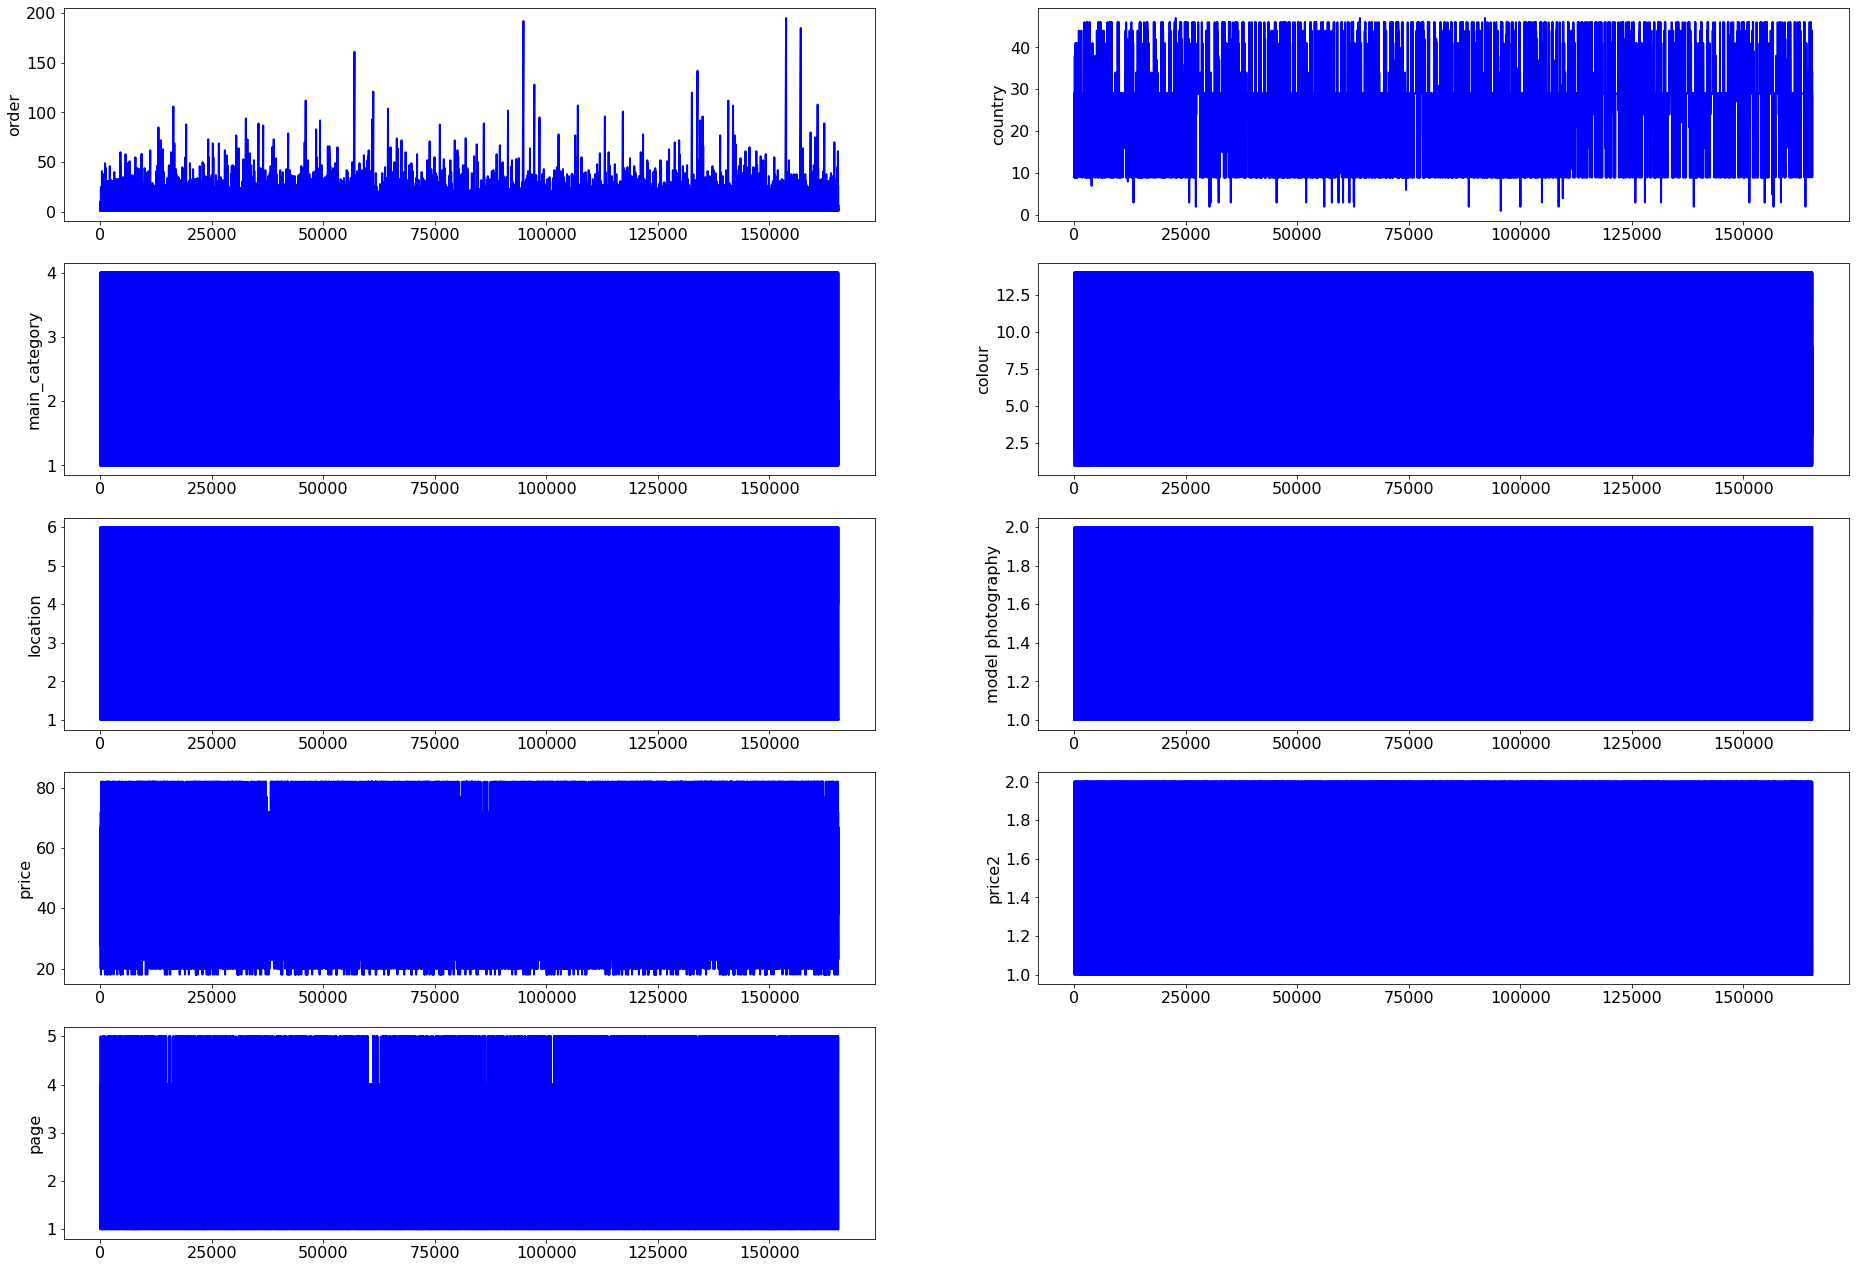

In [121]:
plt.figure(figsize=(32, 32))
plt.rcParams.update({'font.size': 16})
cols = dataset.columns
for i in range(dataset.shape[1]):
    plt.subplot(7, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset[cols[i]], lw=2, color='b')
plt.show()


------------------------------------------
### Adaptive Linear Eigen Decomposition

In [122]:
# Square root of the correlation matrix
from scipy.linalg import eigh

X = dataset.T
nSamples = dataset.shape[0]

# Compute Correlation matrix and eigen vectors of the generated data
corX = (X @ X.T) / nSamples

# Eigenvalues and eigenvectors of corX
eigvals, eigvecs = eigh(corX)
print("eigvals =\n", eigvals[::-1])

EstV = np.fliplr(eigvecs)
EstD  = np.diag(eigvals[::-1])


eigvals =
 [2.92230613e+03 1.85469778e+02 8.40672651e+01 1.92846919e+01
 3.38296222e+00 1.50244904e+00 7.10129289e-01 3.39779207e-01
 1.59302655e-01]


In [123]:
# Adaptive algorithm
from numpy import linalg as la

nSamples = dataset.shape[0]
nDim = dataset.shape[1]

A = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
N = np.zeros(shape=(1,nDim)) # stores eigen norms
W = 0.1 * np.ones(shape=(nDim,nDim)) # stores adaptive eigenvectors
for iter in range(nSamples):
    cnt = iter + 1
    x = np.array(dataset.iloc[iter])
    x = x.reshape(nDim,1)
    A = A + (1.0/cnt)*((np.dot(x, x.T)) - A)
    etat = 1.0/(10000 + cnt)
    # Deflated Gradient Descent
    W = W + etat*(A @ W - 0.5*W @ np.triu(W.T @ A @ W) - 0.5*A @ W @ np.triu(W.T @ W))
    newnorm = la.norm(W, axis=0)
    N = np.vstack([N, newnorm])
print("W=\n", W)


W=
 [[ 0.18529643  0.97631414  0.10161502 -0.03824329 -0.01221379 -0.00748514
  -0.00479546 -0.0035982  -0.00304989]
 [ 0.49536741 -0.01631742 -0.84299096 -0.17952026 -0.06810289 -0.04343499
  -0.02685004 -0.01904315 -0.01507725]
 [ 0.04238973  0.01994296 -0.0684788   0.07933911  0.10034887  0.06981632
   0.04536341  0.03696804  0.03538778]
 [ 0.11237671  0.0258873  -0.12538044  0.97490161 -0.07993499 -0.07532834
  -0.0339926  -0.01592933 -0.00774693]
 [ 0.05857504  0.00599179 -0.04719498  0.06086398  0.90711756  0.61742576
   0.34977158  0.22186003  0.15498903]
 [ 0.02254062  0.00404219 -0.0215959   0.02044713  0.06718282  0.04671335
   0.02822897  0.02015584  0.01659144]
 [ 0.83684715 -0.21231067  0.50311535 -0.02789798 -0.02035974 -0.01315029
  -0.00772056 -0.00509374 -0.00370517]
 [ 0.02560937  0.00627809 -0.04334058  0.01356936  0.11177315  0.07673181
   0.04425595  0.02920052  0.02173791]
 [ 0.03070586  0.01758014 -0.03050351  0.06701042  0.00818234  0.00756925
   0.00949101  0.0

In [124]:
import math
from scipy.linalg import eigh
WTW = W.T @ W
WTAW = W.T @ A @ W
eigvals, eigvecs = eigh(A)
print("Lambda=\n", eigvals)
print("Diags of WTAW")
print([WTAW[i,i] for i in range(len(WTAW[0]))])
print("Diags of WTW")
print([WTW[i,i] for i in range(len(WTW[0]))])


Lambda=
 [1.59302655e-01 3.39779207e-01 7.10129289e-01 1.50244904e+00
 3.38296222e+00 1.92846919e+01 8.40672651e+01 1.85469778e+02
 2.92230613e+03]
Diags of WTAW
[2922.306121719499, 185.46975297464152, 84.06697466394918, 19.28438357597208, 2.914587658060093, 1.3668893381503187, 0.43698270961936786, 0.1781955487505199, 0.09025198793718651]
Diags of WTW
[1.000000000013902, 0.999999969017446, 0.9999966374166411, 0.9999932554332208, 0.8615971796914261, 0.40200600390913643, 0.12920256930852572, 0.05266383647814124, 0.02659475150038235]


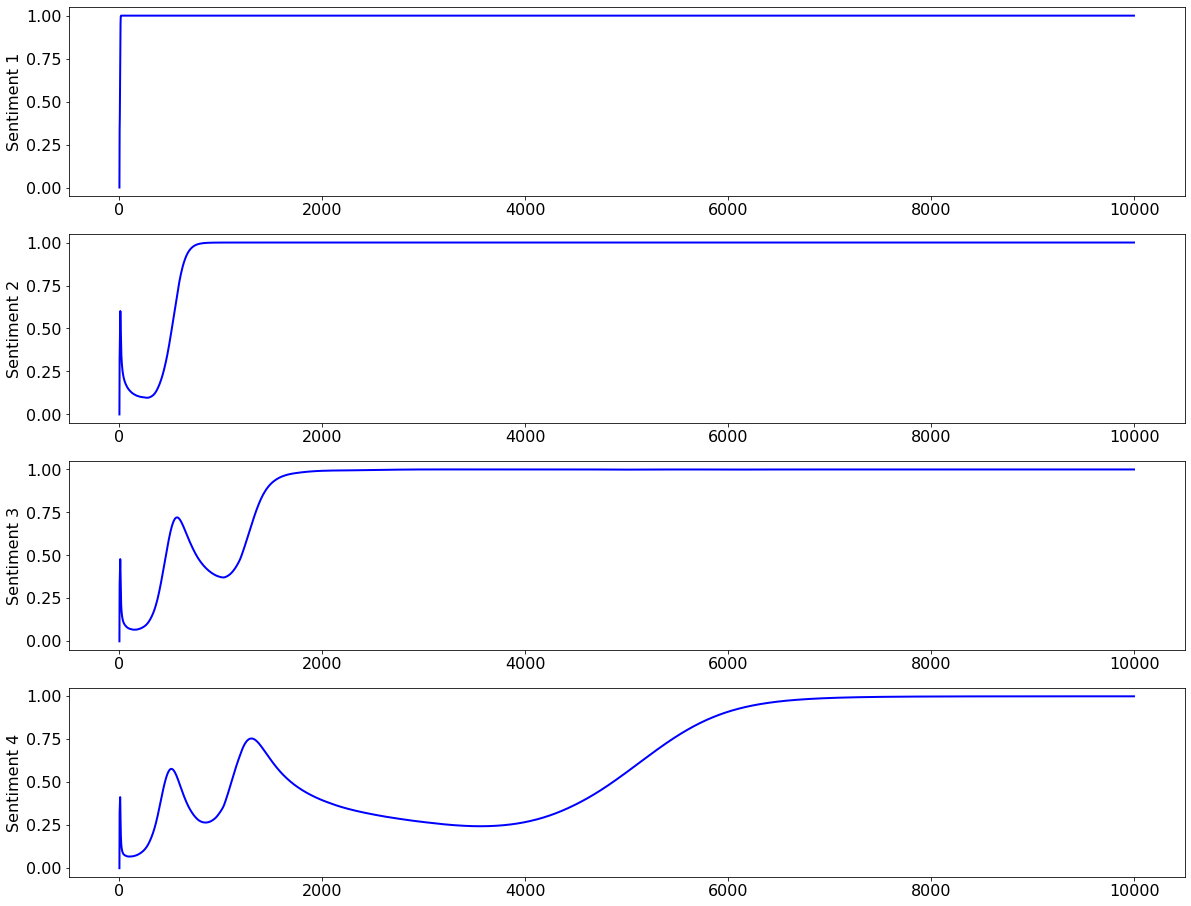

In [128]:
cols = dataset.columns
norms = pd.DataFrame({cols[0]: N[:, 0], cols[1]: N[:, 1], cols[2]: N[:, 2], cols[3]: N[:, 3]})

plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})
cols = norms.columns
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.ylabel('Sentiment {}'.format(i+1))
    plt.plot(norms[cols[i]].iloc[0:10000], lw=2, color='b')
plt.show()

------------------------------------------
### Adaptive Linear Generalized Eigen Decomposition

In [85]:
dataset1 = dataset.drop(['price2'], 1)
print(dataset1.shape)
print(dataset1.head())


(165474, 8)
   order  country  main_category  colour  location  model photography  price  \
0      1       29              1       1         5                  1     28   
1      2       29              1       1         6                  1     33   
2      3       29              2      10         2                  1     52   
3      4       29              2       6         6                  2     38   
4      5       29              2       4         3                  2     52   

   page  
0     1  
1     1  
2     1  
3     1  
4     1  


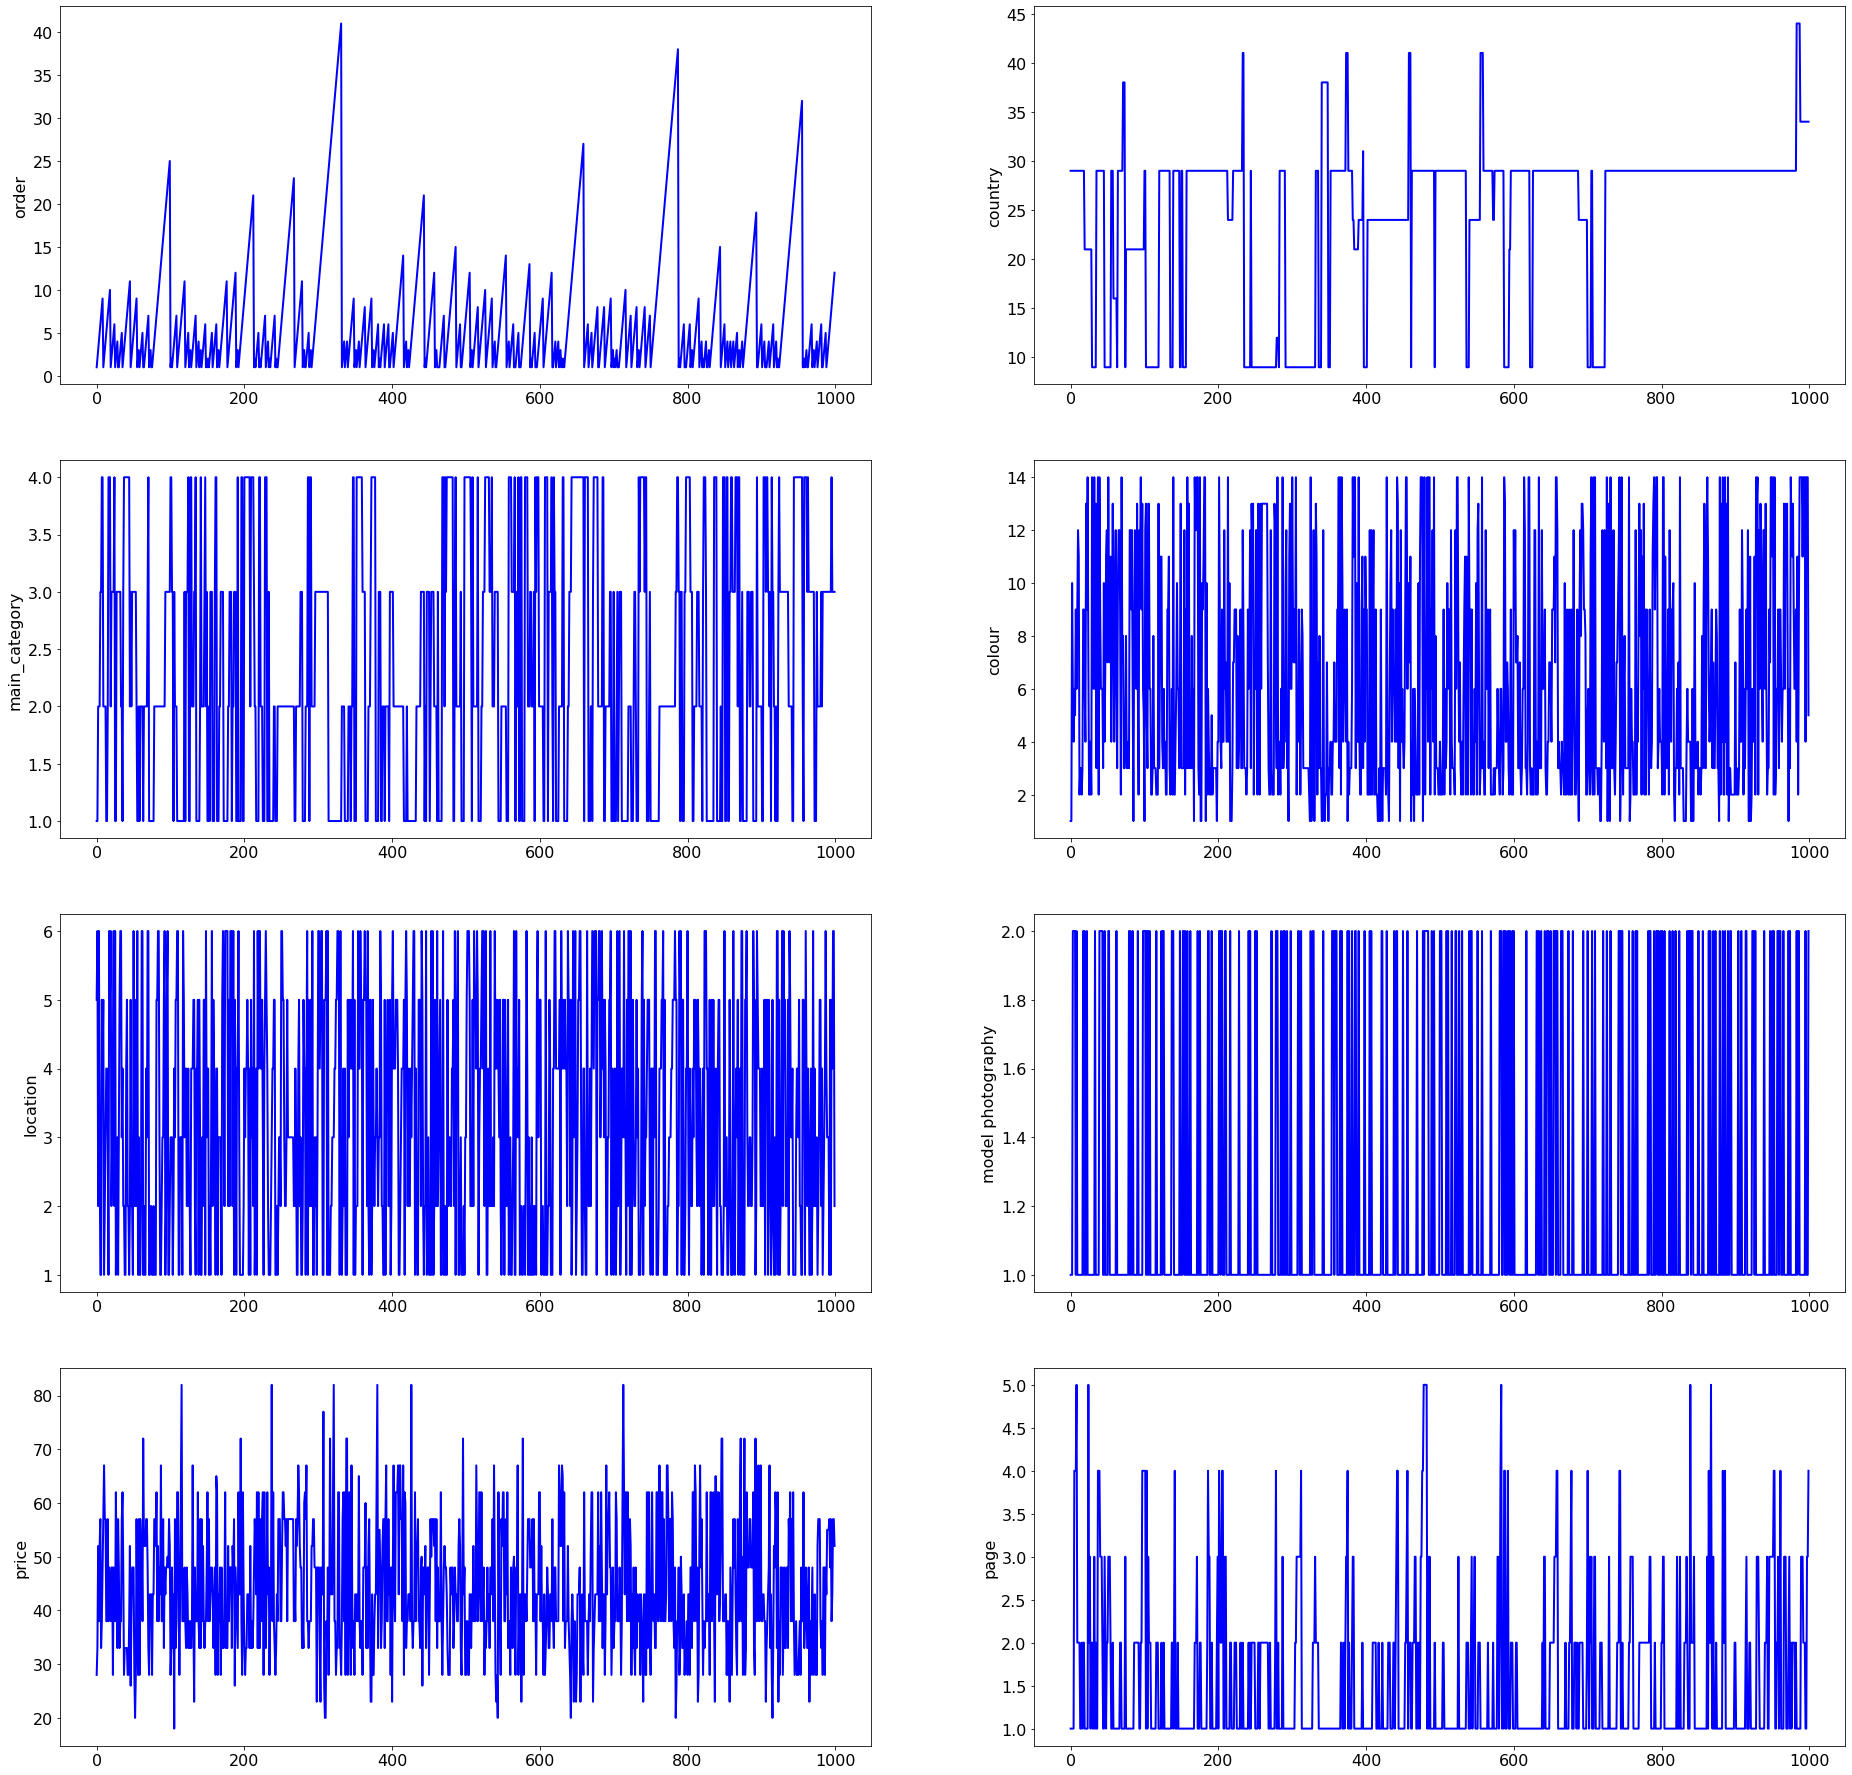

In [86]:
plt.figure(figsize=(32, 32))
plt.rcParams.update({'font.size': 16})
cols = dataset1.columns
for i in range(dataset1.shape[1]):
    plt.subplot(4, 2, i+1)
    plt.ylabel(cols[i])
    plt.plot(dataset1[cols[i]].iloc[0:1000], lw=2, color='b')
plt.show()


In [87]:
# Compute A and B
from numpy import linalg as la

nSamples = dataset1.shape[0]
nDim = dataset1.shape[1]

classes = np.array(dataset['price2']-1)
classes_categorical = tf.keras.utils.to_categorical(classes, num_classes=2)

M = np.zeros(shape=(nDim,2)) # stores adaptive correlation matrix
B = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
for iter in range(nSamples):
    cnt = iter + 1
    x = np.array(dataset1.iloc[iter])
    x = x.reshape(nDim,1)
    B = B + (1.0/cnt)*((np.dot(x, x.T)) - B)
    y = classes_categorical[iter].reshape(2,1)
    M = M + (1.0/cnt)*((np.dot(x, y.T)) - M)
    A = M @ M.T


In [88]:
import seaborn as sns
from scipy.linalg import eigh
from sklearn.preprocessing import normalize

#A = 5*A
eigvals, eigvecs = eigh(A, B)
EstV = np.fliplr(eigvecs)
EstV = normalize(EstV, axis=0, norm='l2')

In [102]:
# Adaptive algorithm
from numpy import linalg as la

nSamples = dataset1.shape[0]
nDim = dataset1.shape[1]
nEpochs = 2

classes = np.array(dataset['price2']-1)
classes_categorical = tf.keras.utils.to_categorical(classes, num_classes=2)

M = np.zeros(shape=(nDim,2)) # stores adaptive correlation matrix
B = np.zeros(shape=(nDim,nDim)) # stores adaptive correlation matrix
N = np.zeros(shape=(1,nDim)) # stores eigen norms
W = 0.1 * np.ones(shape=(nDim,nDim)) # stores adaptive eigenvectors
cos_t1 = np.zeros(shape=(1, nSamples*nEpochs)) # cosine error
for epoch in range(nEpochs):
    for iter in range(nSamples//1):
        cnt = nSamples*epoch + iter
        x = np.array(dataset1.iloc[iter])
        x = x.reshape(nDim,1)
        B = B + (1.0/(1 + cnt))*((np.dot(x, x.T)) - B)
        y = classes_categorical[iter].reshape(2,1)
        M = M + (1.0/(1 + cnt))*((np.dot(x, y.T)) - M)
        A = M @ M.T
        etat = 1.0/(1000000 + cnt)
        # Deflated Gradient Descent
        W = W + etat*(A @ W - 0.5* B @ W @ np.triu(W.T @ A @ W) - 0.5*A @ W @ np.triu(W.T @ B @ W))
        WTBW = W.T @ B @ W
        newnorm = [math.sqrt(WTBW[i,i]) for i in range(len(WTBW[0]))]
        N = np.vstack([N, newnorm])

        u1 = W[:,0]/la.norm(W[:,0])
        u1 = u1.reshape(nDim,1)
        v1 = EstV[:,0].reshape(nDim,1)
        cos_t1[0,cnt] = abs(u1.T @ v1)

print("W=\n", W)


W=
 [[-0.00301755  0.0137993   0.03443046  0.04050122  0.04626827  0.05733426
   0.06729544  0.07094961]
 [-0.00625191  0.03964009 -0.07640767 -0.0873372  -0.07272877 -0.05821134
  -0.0509693  -0.05220784]
 [ 0.07860162  0.08694026  0.08842221  0.08981108  0.09094713  0.09175949
   0.09215209  0.0921073 ]
 [ 0.0161027   0.06879724  0.06851925  0.07187572  0.07500346  0.0782854
   0.08064935  0.08146536]
 [ 0.06901339  0.09143749  0.07166711  0.0682953   0.06985774  0.07248838
   0.07433635  0.07462266]
 [ 0.09169969  0.09736617  0.09110306  0.09030417  0.09116828  0.09232613
   0.09314904  0.09338637]
 [ 0.00947994 -0.05572085  0.01102329  0.01781871  0.00733779 -0.00438741
  -0.01150797 -0.01183901]
 [ 0.08241928  0.09448479  0.08815434  0.08765412  0.08884542  0.09041246
   0.09156371  0.09193181]]


In [103]:
import math
from scipy.linalg import eigh
WTAW = W.T @ A @ W
WTBW = W.T @ B @ W
eigvals, eigvecs = eigh(A, B)
print("Lambda=\n", eigvals)
print("Diags of WTAW")
print([WTAW[i,i] for i in range(len(WTAW[0]))])
print("Diags of WTBW")
print([math.sqrt(WTBW[i,i]) for i in range(len(WTBW[0]))])


Lambda=
 [-3.21970348e-16 -1.09617483e-16  1.13451189e-16  3.95156619e-16
  4.66473426e-16  1.08953191e-15  2.08879470e-01  4.99781189e-01]
Diags of WTAW
[0.494145843213176, 0.12299841807555911, 0.011456562331338745, 0.016326687269799925, 0.003560913225873747, 0.0003835767473736336, 0.004036789792367342, 0.004216212651880945]
Diags of WTBW
[1.0108744805694214, 0.985942781904102, 0.8561807237734866, 0.967487752320785, 0.9552853570838645, 1.0431435294322526, 1.1606257951916001, 1.2084925779198064]


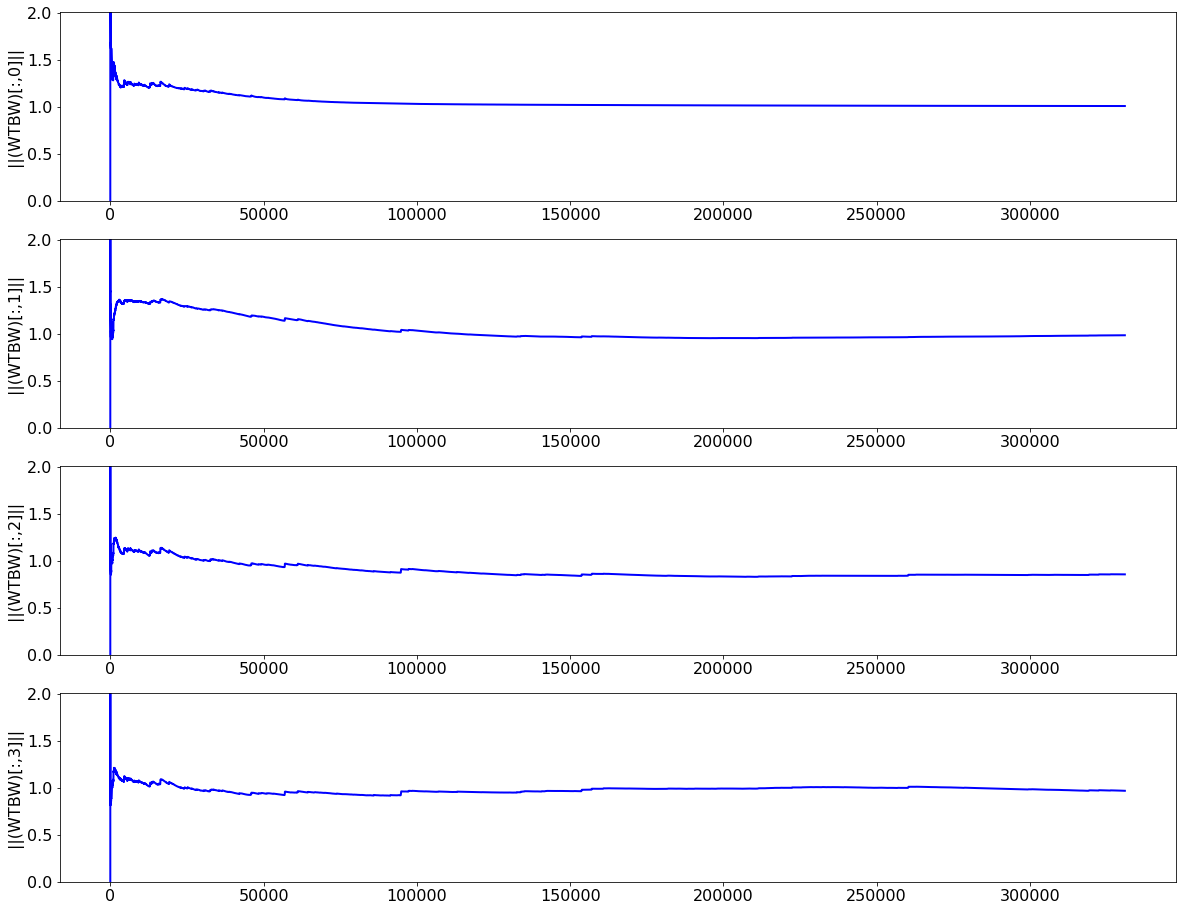

In [104]:
cols = dataset1.columns
norms = pd.DataFrame({cols[0]: N[:, 0], cols[1]: N[:, 1], cols[2]: N[:, 2], cols[3]: N[:, 3], \
                      cols[4]: N[:, 4], cols[5]: N[:, 5], cols[6]: N[:, 6], cols[7]: N[:, 7]})

plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})
cols = norms.columns
for i in range(4):
    plt.subplot(4, 1, i+1)
    plt.ylabel('||(WTBW)[:,{}]||'.format(i))
    plt.ylim([0,2.01])
    plt.plot(norms[cols[i]], lw=2, color='b')
plt.show()


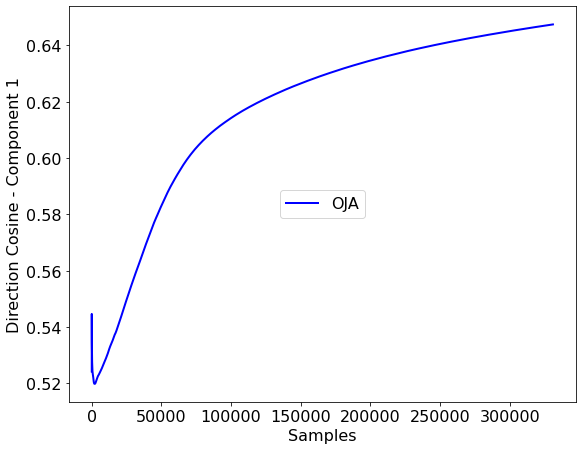

In [105]:
plt.figure(figsize=(20, 16))
plt.rcParams.update({'font.size': 16})

plt.subplot(2, 2, 1)
plt.plot(cos_t1[0,:], lw=2, color='b', label='OJA')
plt.ylabel('Direction Cosine - Component 1')
plt.xlabel('Samples')
plt.legend(loc="center")

plt.show()

VTBV=
 [[ 1. -0.  0. -0. -0. -0.  0. -0.]
 [-0.  1. -0.  0. -0.  0. -0. -0.]
 [ 0.  0.  1.  0.  0.  0.  0. -0.]
 [-0.  0.  0.  1.  0. -0.  0.  0.]
 [-0. -0.  0. -0.  1. -0. -0. -0.]
 [ 0.  0.  0.  0. -0.  1. -0. -0.]
 [-0.  0.  0. -0. -0. -0.  1.  0.]
 [ 0.  0. -0. -0. -0.  0. -0.  1.]]
VTAV=
 [[62.47  0.    0.    0.   -0.   -0.    0.   -0.  ]
 [-0.   26.11  0.   -0.    0.   -0.    0.    0.  ]
 [ 0.   -0.    0.    0.    0.   -0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.    0.   -0.   -0.  ]
 [-0.    0.   -0.   -0.   -0.   -0.   -0.    0.  ]
 [-0.   -0.    0.    0.    0.   -0.   -0.    0.  ]
 [-0.    0.    0.    0.   -0.   -0.   -0.   -0.  ]
 [ 0.    0.   -0.    0.   -0.   -0.   -0.   -0.  ]]


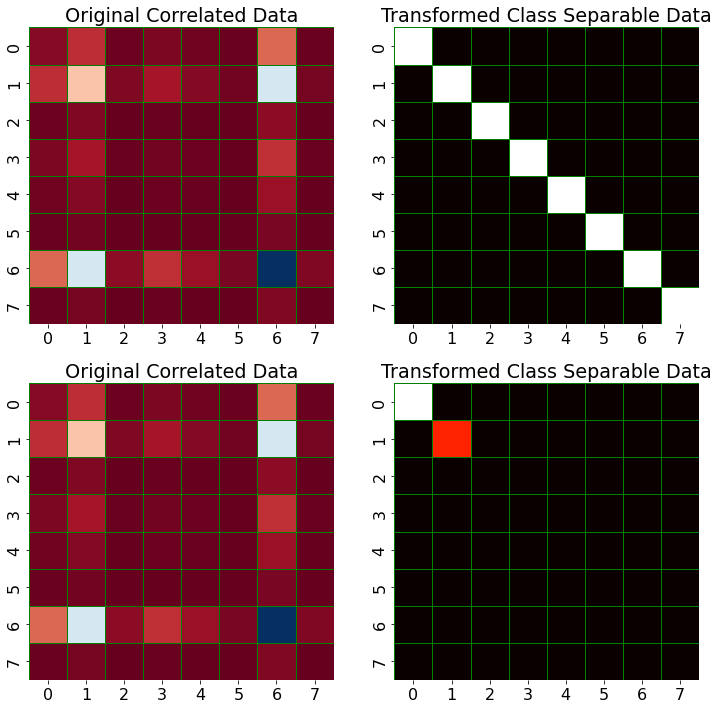

In [108]:
import seaborn as sns
from scipy.linalg import eigh
from sklearn.preprocessing import normalize

A = 5*A
eigvals, eigvecs = eigh(A, B)
EstV = np.fliplr(eigvecs)
EstV = normalize(EstV, axis=0, norm='l2')

V = np.fliplr(eigvecs)
D  = np.diag(np.sqrt(eigvals[::-1]))
VTAV = np.around(V.T @ A @ V, 2)
VTBV = np.around(V.T @ B @ V, 2)
print("VTBV=\n", VTBV)
print("VTAV=\n", VTAV)

plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size': 16})

plt.subplot(2, 2, 1)
sns.heatmap(A, linewidth=0.5, linecolor="green", cmap='RdBu', cbar=False)
plt.title("Original Correlated Data")

plt.subplot(2, 2, 2)
sns.heatmap(VTBV, linewidth=0.5, linecolor="green", cmap='hot', cbar=False)
plt.title("Transformed Class Separable Data")

plt.subplot(2, 2, 3)
sns.heatmap(A, linewidth=0.5, linecolor="green", cmap='RdBu', cbar=False)
plt.title("Original Correlated Data")

plt.subplot(2, 2, 4)
sns.heatmap(VTAV, linewidth=0.5, linecolor="green", cmap='hot', cbar=False)
plt.title("Transformed Class Separable Data")

plt.show()
